## Test task 1

Необходимо:
1. Просегментировать их по критерию дохода
2. Построить когортный анализ отталкиваясь от creation_month (дата регистрации пользователя) 
3. Построить прогноз "выживаемсости" пользователей до конца 2022 на основании текущих данных
4. Сделать выводы: сколько живут пользователи, критический доход/месяц для выживаемости. 


У нас есть база данных пользователей, и нам нужно исследовать несколько важных метрики: удержание, время жизни, эффективность и т. д.

Примечание: 
Во вкладке Input users добавлена информация о среднем количестве пользователей с которыми ведется общение

**План**
1. Загрузка данных и подготовка их к анализу
- Общая информация о таблице и обзор первых строк таблицы
- Приведение типов
- Обзор статистики всей таблицы
2. Функции для Retention Rate и LTV
- Создание профилей пользователей
- Функция для расчета Retention Rate
- Функция для расчета LTV
3. Исследовательский анализ данных
- Расчет среднего дохода пользователя и количества месяцев, которые он пользуется ресурсом
- Количество регистраций пользователей за каждый месяц(обьемы когорт)
- Средний доход от клиента в зависимости от даты регистрации
- Сегментация клиентов по критерию дохода
- Продолжительность жизни в зависимости от категории клиента
- Количество регистраций в зависимости от ресурса
4. Retention Rate и LTV
- Retention Rate c горизонтом анализа 16 месяцев
- Анализ удержания пользователей с разбивкой по resource_id
- LTV c горизонтом анализа 7 месяцев
- LTV с разбивкой по resource_id
5. Прогноз
- Прогноз выживаемости пользователей до конца 2022 года
- Прогноз дохода пользователей до конца 2022 года
5. Выводы

# 1. Загрузка данных и подготовка их к анализу


<div class="alert alert-info">Загрузка данных и подготовка их к анализу</div>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import warnings
import re
from pandas.tseries.offsets import DateOffset
warnings.filterwarnings("ignore")
from statsmodels.tsa.statespace.sarimax import SARIMAX

data = pd.read_csv('Data task 1.csv')

<div class="alert alert-info"><b>Общая информация</b> о таблице и обзор первых строк таблицы</div>

In [2]:
data.info()

print(60*'=-')
print(f'Количество полных дубликатов: {data.duplicated().sum()}')
print(60*'=-')

data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7695 entries, 0 to 7694
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_id         7695 non-null   int64 
 1   resource_id     7695 non-null   int64 
 2   creation_month  7695 non-null   object
 3   2021-01         1043 non-null   object
 4   2021-02         997 non-null    object
 5   2021-03         1071 non-null   object
 6   2021-04         1105 non-null   object
 7   2021-05         1121 non-null   object
 8   2021-06         1214 non-null   object
 9   2021-07         1289 non-null   object
 10  2021-08         1224 non-null   object
 11  2021-09         1231 non-null   object
 12  2021-10         1266 non-null   object
 13  2021-11         1300 non-null   object
 14  2021-12         1158 non-null   object
 15  2022-01         1268 non-null   object
 16  2022-02         1290 non-null   object
 17  2022-03         1620 non-null   object
 18  2022-04 

,user_id,resource_id,creation_month,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,...,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,Total
0,945,3,31.08.2019,"$3 525,08","$3 339,01","$3 584,90","$3 577,00","$3 645,18","$3 772,16","$3 589,36",...,"$3 979,59","$3 923,85","$4 136,68","$5 473,53","$6 411,77","$4 433,06","$6 151,22","$6 680,98","$4 279,11","$74 251,35"
1,8364,1,31.12.2020,"$1 905,07","$2 843,12","$3 213,85","$3 646,26","$4 155,31","$4 172,85","$4 340,94",...,"$6 007,07","$6 585,96","$4 346,99","$5 258,59","$4 757,34","$4 758,79","$4 306,37","$5 640,22","$3 009,68","$72 363,04"
2,2863,3,31.12.2019,"$1 232,22","$1 336,70","$2 341,13","$2 336,77","$4 171,43","$4 286,13","$4 575,84",...,"$3 759,40","$4 036,38","$4 385,16","$5 407,88","$6 292,41","$6 084,62","$5 493,76","$6 004,60","$5 097,29","$71 561,02"
3,2478,3,30.11.2019,"$3 272,35","$2 712,81","$2 939,12","$2 752,17","$2 498,11","$2 618,42","$88,76",...,"$6 661,88","$4 370,88","$4 796,71","$5 809,40","$5 814,88","$5 413,78","$4 988,67","$5 200,38","$4 091,69","$69 409,55"
4,1711,3,31.10.2019,"$5 129,81","$4 337,31","$4 356,23","$3 059,35","$2 643,99","$3 007,51","$3 476,75",...,"$3 791,62","$3 799,74","$3 839,28","$4 517,98","$5 641,39","$4 864,59","$5 653,30","$4 398,41",NaN,"$65 631,21"


**Промежуточный вывод**
- В таблице 7695 строк
- Дубликатов нет
- столбец creation_month необходимо привести к типу дата
- столбцы 2021-01 - 2022.05 - к числовому типу

<div class="alert alert-info"><b>Приведение типов</div>

In [3]:
data['creation_month']=pd.to_datetime(data['creation_month']).dt.date

In [4]:
months = data.columns[3:]
for month in months:
    data[month] = data[month].str.replace("$", "").str.replace(",", ".").str.replace("\s", "")
    data[month] = pd.to_numeric(data[month], errors='coerce')
    data.loc[data[month] == 0, month] = np.nan

In [5]:
# проверка изменений типов данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7695 entries, 0 to 7694
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         7695 non-null   int64  
 1   resource_id     7695 non-null   int64  
 2   creation_month  7695 non-null   object 
 3   2021-01         991 non-null    float64
 4   2021-02         992 non-null    float64
 5   2021-03         1065 non-null   float64
 6   2021-04         1101 non-null   float64
 7   2021-05         1103 non-null   float64
 8   2021-06         1208 non-null   float64
 9   2021-07         1285 non-null   float64
 10  2021-08         1216 non-null   float64
 11  2021-09         1224 non-null   float64
 12  2021-10         1258 non-null   float64
 13  2021-11         1292 non-null   float64
 14  2021-12         1154 non-null   float64
 15  2022-01         1260 non-null   float64
 16  2022-02         1281 non-null   float64
 17  2022-03         1601 non-null   f

**Промежуточный вывод**
- В строках с доходом были обнаружено некоторое количество значений 0. После изучения таблицы я пришла к выводу что это ошибка данных. Я привела их к Nan, что бы при анализе и подсчете средних значений они не влияли на исход.

<div class="alert alert-info"><b>Обзор статистики всей таблицы</div>

In [6]:
data.describe()

,user_id,resource_id,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,Total
count,7695.000000,7695.000000,991.000000,992.000000,1065.000000,1101.000000,1103.000000,1208.000000,1285.000000,1216.000000,1224.000000,1258.000000,1292.000000,1154.000000,1260.000000,1281.000000,1601.000000,1692.000000,1692.000000,7446.000000
mean,12472.031579,8.068486,609.606781,559.088952,592.484601,610.190772,613.739946,557.483328,580.857097,593.967130,580.171087,606.617488,580.366827,761.026135,733.090452,708.937939,711.567014,711.869368,592.454232,1821.099009
std,3807.564882,12.012389,755.005079,668.814839,746.691719,769.420451,770.668582,738.357741,782.152267,753.514255,787.925184,791.595600,768.991998,925.159425,954.592946,899.057700,1051.353076,986.614488,886.800507,5496.097762
min,15.000000,1.000000,0.110000,-0.440000,0.110000,-7.480000,0.110000,0.110000,0.110000,0.110000,0.110000,0.110000,0.110000,0.110000,0.110000,-1.760000,0.110000,0.110000,0.110000,-0.550000
25%,9983.000000,1.000000,58.470000,51.100000,56.600000,42.970000,62.425000,40.760000,35.130000,45.527500,43.047500,33.592500,26.592500,48.367500,40.122500,55.110000,21.180000,48.830000,58.530000,8.030000
50%,12778.000000,1.000000,304.860000,330.515000,306.020000,318.170000,328.180000,265.525000,291.900000,308.665000,275.610000,300.205000,291.940000,409.080000,373.715000,383.170000,306.420000,357.745000,315.985000,108.730000
75%,15541.500000,3.000000,908.640000,817.775000,857.830000,920.460000,912.305000,800.645000,823.700000,871.125000,840.690000,889.430000,850.785000,1121.237500,1072.202500,1051.640000,983.540000,986.752500,813.232500,970.432500
max,18301.000000,30.000000,5466.900000,4526.320000,5337.320000,5682.710000,5179.500000,5316.630000,8042.310000,5379.540000,6661.880000,6585.960000,5911.250000,5809.400000,6446.750000,6673.710000,9820.940000,9433.840000,15329.360000,74251.350000


**Промежуточный вывод**
- В строках с доходом также есть отрицательные значения. Возможно это ошибка, но пока не буду их трогать(их совсем немного и на общий расчет они не окажут влияния)

# 2. Функции для Retention Rate и LTV


*Сам анализ будет чуть ниже (п4)*

<div class="alert alert-info">Создание профилей пользователей</div>

In [7]:
#создание профилей пользователей
data_pivot = (data.melt(['user_id','resource_id','creation_month','Total'], var_name='date')
        .pivot_table(index=['user_id','resource_id','creation_month','date'], 
                     values='value',
                     aggfunc='mean')
        .reset_index()
        .rename_axis(None, axis=1)
)

data_pivot['date']=pd.to_datetime(data_pivot['date']).dt.date

# удалим из профилей все когорты до 2021 года, так как в них нет информации о 1ом лайфтайме
min_date = datetime(2021, 1, 31).date()
profiles = data_pivot.query('creation_month >= @min_date')

<div class="alert alert-info">Функция для расчета Retention Rate</div>

In [8]:
def get_retention(
    profiles, observation_date, horizon_month, dimensions, ignore_horizon
):

    # рассчитываем максимально возможную дату привлечения
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date  - DateOffset(months = horizon_month - 1)

    # исключаем пользователей, пришедших после максимальной даты 
    result_raw = profiles.query('creation_month <= @last_suitable_acquisition_date')

    # вычисляем лайфтайм каждой сессии в месяцах
    result_raw['lifetime'] = ((result_raw['date'] - result_raw['creation_month']).dt.days+30)/30
    result_raw['lifetime'] = result_raw['lifetime'].round()

    # строим таблицу удержания
    result_grouped = result_raw.pivot_table(
        index=dimensions, columns='lifetime', values='user_id', aggfunc='nunique'
    )
    pd.set_option('display.max_columns', None)

    # вычисляем размеры когорт
    cohort_sizes = (
        result_raw.groupby(dimensions)
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'cohort_size'})
    )

    # объединяем размеры когорт и таблицу удержания
    result_grouped = cohort_sizes.merge(
        result_grouped, on=dimensions, how='left'
    ).fillna(0)

    # делим данные таблицы удержания на размеры когорт
    result_grouped = result_grouped.div(result_grouped['cohort_size'], axis=0)

    # исключаем из результата все лайфтаймы, превышающие горизонт анализа
    result_grouped = result_grouped[['cohort_size'] + list(range(horizon_month))]

    # восстанавливаем cohort_size
    result_grouped['cohort_size'] = cohort_sizes

    # возвращаем таблицу удержания и сырые данные
    # сырые данные пригодятся, если нужно будет отыскать ошибку в расчётах
    return result_raw, result_grouped

<div class="alert alert-info">Функция для расчета LTV</div>

In [9]:
def get_ltv(
    profiles, observation_date, horizon_month, dimensions, ignore_horizon
):

    # рассчитываем максимально возможную дату привлечения
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date  - DateOffset(months = horizon_month - 1)

    # исключаем пользователей, пришедших после максимальной даты 
    result_raw = profiles.query('creation_month <= @last_suitable_acquisition_date')

    # вычисляем лайфтайм каждой сессии в месяцах
    result_raw['lifetime'] = ((result_raw['date'] - result_raw['creation_month']).dt.days+30)/30
    result_raw['lifetime'] = result_raw['lifetime'].round()

    
    # Построить таблицу выручки
    
    result = result_raw.pivot_table(
    index=dimensions,
    columns='lifetime',
    values='value',  # в ячейках — выручка за каждый лайфтайм
    aggfunc='sum',
        )

    # Посчитать сумму выручки с накоплением
    result_grouped = result.fillna(0).cumsum(axis=1)
    
    # вычисляем размеры когорт
    cohort_sizes = (
        result_raw.groupby(dimensions)
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'cohort_size'})
    )

    # объединяем размеры когорт и таблицу удержания
    result_grouped = cohort_sizes.merge(
        result_grouped, on=dimensions, how='left'
    ).fillna(0)

    # делим данные таблицы удержания на размеры когорт
    result_grouped = result_grouped.div(result_grouped['cohort_size'], axis=0)

    # исключаем из результата все лайфтаймы, превышающие горизонт анализа
    result_grouped = result_grouped[['cohort_size'] + list(range(horizon_month))]

    # восстанавливаем cohort_size
    result_grouped['cohort_size'] = cohort_sizes

    # получаем таблицу LTV
    
    # возвращаем таблицу удержания и сырые данные
    # сырые данные пригодятся, если нужно будет отыскать ошибку в расчётах
    return result_raw, result_grouped

# 3. Исследовательский анализ данных


<div class="alert alert-info">Считаем средний доход пользователя и количество месяцев, которые он пользуется ресурсом</div>

In [10]:
#создание таблицы income для общего анализа всех пользователей без учета ресурса
data_transp_general = data_pivot.groupby(['user_id','creation_month','date'],as_index=False).agg({'value': 'sum'})
income = data_transp_general.groupby(['user_id','creation_month'],
                                     as_index=False).agg({'value': 'sum','date':'count'}).rename(columns={'value': 'total_income','date':'count_month'})
income['averege_income'] = income['total_income'] / income['count_month']
income['year'] = pd.to_datetime(data['creation_month']).dt.year
income.head()

,user_id,creation_month,total_income,count_month,averege_income,year
0,15,2019-05-31,22.40,17,1.317647,2019
1,17,2019-06-30,24805.20,17,1459.129412,2020
2,21,2019-06-30,5.50,1,5.500000,2019
3,36,2019-06-30,183.44,8,22.930000,2019
4,37,2019-06-30,26.13,14,1.866429,2019


**Промежуточный вывод**
- данная таблица сгруппирована по юзерам и их доходу каждый месяц, без учета ресурса. То есть тут все юзеры уникальные.
- в данных не хватает данных от пользователей зарегестрировавшихся в 2019-2020 годах. Данные о доходах у нас есть только за период с 2021 года. 

<div class="alert alert-info">Добавим последнюю сумму и дату, в которую был активен пользователь</div>

In [11]:
last_date = data_pivot.sort_values(by='date')
last_date = last_date.groupby('user_id').agg({'value': 'last', 'date': 'last'}).reset_index()
income = income.merge(last_date, on='user_id', how='left').rename(columns={'value':'last_value','date':'last_date'})

income.head()

,user_id,creation_month,total_income,count_month,averege_income,year,last_value,last_date
0,15,2019-05-31,22.40,17,1.317647,2019,0.22,2022-05-01
1,17,2019-06-30,24805.20,17,1459.129412,2020,780.71,2022-05-01
2,21,2019-06-30,5.50,1,5.500000,2019,5.50,2022-05-01
3,36,2019-06-30,183.44,8,22.930000,2019,59.68,2022-05-01
4,37,2019-06-30,26.13,14,1.866429,2019,2.75,2022-05-01


<div class="alert alert-info">Количество регистраций пользователей за каждый месяц (обьемы когорт)</div>

''

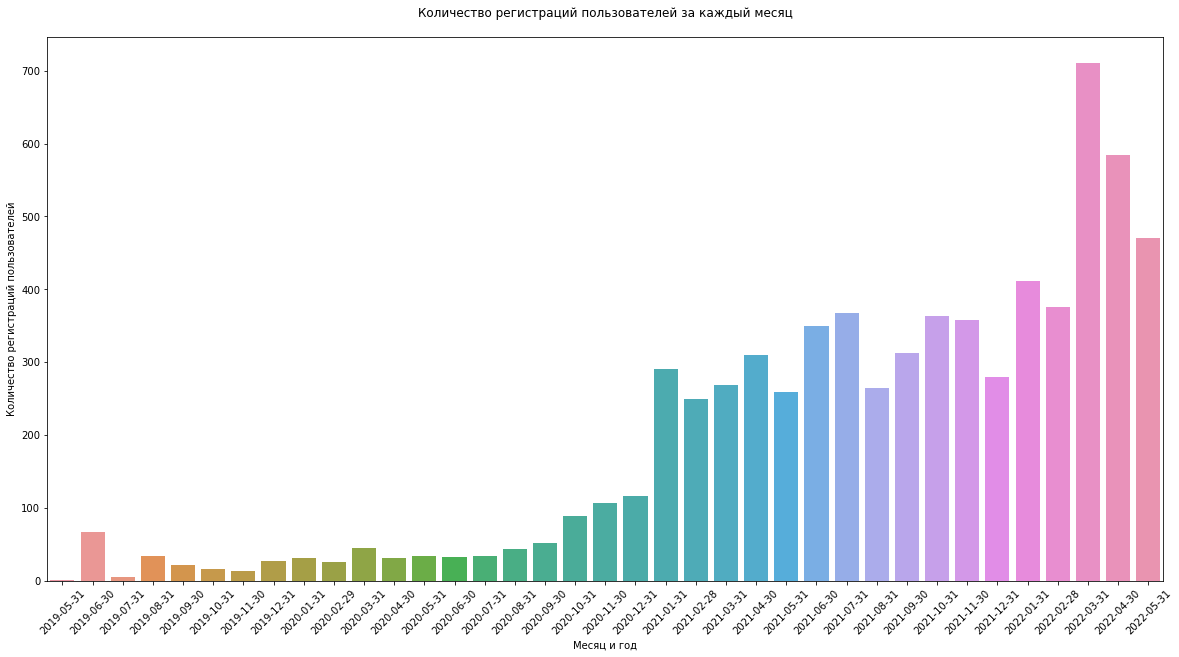

In [12]:
count_of_registration = income.groupby('creation_month')['user_id'].count().reset_index().sort_values(by='creation_month')
plt.figure(figsize=(20,10))  
sns.barplot(y = 'user_id', x='creation_month',  data=count_of_registration)
plt.title('Количество регистраций пользователей за каждый месяц', pad = 20)
plt.xlabel('Месяц и год')
plt.ylabel('Количество регистраций пользователей')
plt.xticks(rotation=45)
,

**Промежуточный вывод**
- Видим, что декабря 2020 года количество регистраций резко увеличилось. 
- В марте 2022 года еще один сильный скачок регистаций с 400 до 700 новых пользователей в месяц.

<div class="alert alert-info">Средний доход от клиента в зависимости от даты регистрации</div>

''

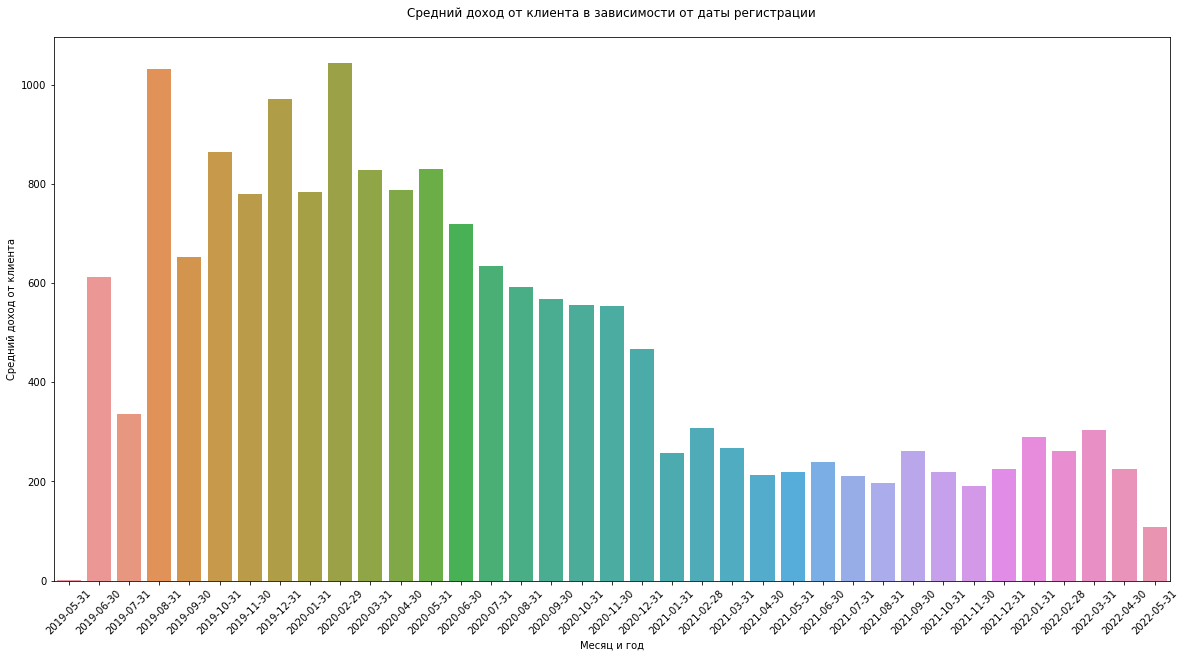

In [13]:
avarege_income = income.groupby('creation_month')['averege_income'].mean().reset_index().sort_values(by='creation_month')
plt.figure(figsize=(20,10))  
sns.barplot(y = 'averege_income', x='creation_month',  data=avarege_income)
plt.title('Средний доход от клиента в зависимости от даты регистрации', pad = 20)
plt.xlabel('Месяц и год')
plt.ylabel('Средний доход от клиента')
plt.xticks(rotation=45)
,

**Промежуточный вывод**
- Мы видим, что средний доход пользователей, которые зарегистрировались до 2021 года значительно выше, не смотря на то, что данные собраны только с 2021 года. Предположу, что либо данные о доходах были перенесены (сдвинуты) по датам для анализа, либо ошибка в дате регистрации. Исхожу из того что данная часть датасета сильно отличается от новой(начиная с 2021 года).

<div class="alert alert-info"> Среднее количество месяцев жизни клиента в зависимости от даты регистрации клиента </div>

''

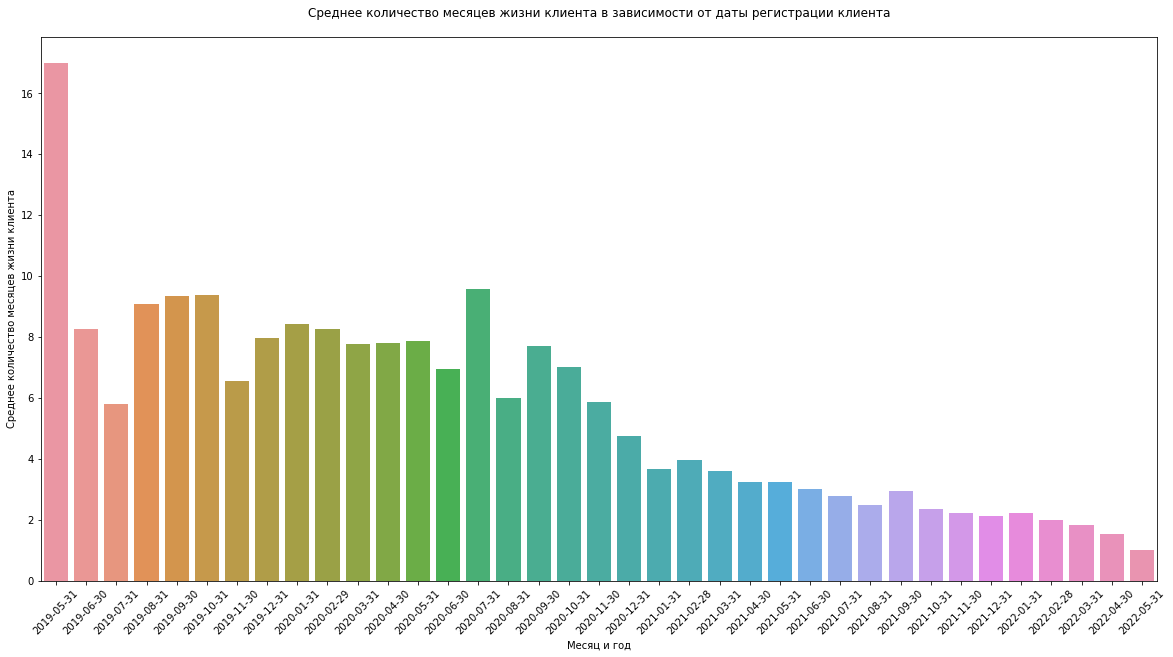

In [14]:
count_of_month = income.groupby('creation_month')['count_month'].mean().reset_index().sort_values(by='creation_month')
plt.figure(figsize=(20,10))  
sns.barplot(y = 'count_month', x='creation_month',  data=count_of_month)
plt.title('Среднее количество месяцев жизни клиента в зависимости от даты регистрации клиента', pad = 20)
plt.xlabel('Месяц и год')
plt.ylabel('Среднее количество месяцев жизни клиента')
plt.xticks(rotation=45)
,

**Промежуточный вывод**
- Видим, что срок жизни клиентов падает. в 2019-2020 годах он держался на уровне 6-8 ми месяцев. В 21-ом году опустился до 2-3 месяцев.
- 2022-ой год анализировать рано, так как клиенты еще не прожили достаточно месяцев для анализа.

<div class="alert alert-info"> Распределение среднего дохода клиента для сегментации по доходу </div>

Статистика среденего дохода пользователя


count    7050.000000
mean      285.305503
std       493.832436
min        -0.550000
25%         7.710000
50%        77.468333
75%       350.843125
max      8098.630000
Name: averege_income, dtype: float64

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
40,60,90 перцентали
[  52.02325     350.843125   1035.48856042]
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
93,95 и 99 перценталь
[1035.48856042 1243.33436471 2346.64585385]
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 


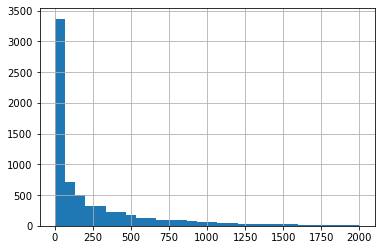

In [15]:
income['averege_income'].hist(bins = 30, range=(0, 2000))
print('Статистика среденего дохода пользователя')
display(income['averege_income'].describe())
print(60* '= ')
print('40,60,90 перцентали')
print(np.percentile(income['averege_income'].dropna(), [45,75,93]))
print(60* '= ')
print('93,95 и 99 перценталь')
print(np.percentile(income['averege_income'].dropna(), [93,95,99]))
print(60* '= ')

**Промежуточный вывод**
- В статистике видим, что средний доход(mean - 285 дол.) намного выше медианного дохода (77 долл.), что говорит о том, что есть очень высокодоходные клиенты.
- Максимальный средний доход пользователя - 8098 долл.
- Минимальный имеет небольшое минусовое значение. (Причиной минуса скорей всего является ошибка, но пока не буду ее трогать)
- Только 5% клиектов имеют средний дохов выше 1200 долл и только 1% - выше 2300 долл.

**Предлагаю такое распределение категорий:**
- около 45% клиентов (до 50 долл) - низкодоходные клиенты
- около 30% клиентов (от 50 до 300 долл) - среднедоходное клиенты
- около 20% клиентов (от 300 до 1000 долл) - высокодоходные клиенты
- около 5 % клиентов  (от 1000 до 8000 долл) - премиум клиенты

*При необходимости данное распределение можно изменить в зависимости от целей бизнеса*

<div class="alert alert-info"> Сегментация клиентов по критерию дохода </div>

In [16]:
low_income = 50 
average_income = 300
high_income = 1000


def category_income_func(row):
    try:
        if row['averege_income'] <= low_income:
            return 'low_income'
        if row['averege_income'] <= average_income:
            return 'average_income'
        if row['averege_income'] <= high_income:
            return 'high_income'
        else:
            return 'premium_clients'
    except:
        return NaN
    

income['category_income'] = income.apply(category_income_func, axis=1)


print('Количество пользователей в каждой категории:')
income['category_income'].value_counts().sort_values(ascending=False)

Количество пользователей в каждой категории:


low_income         3142
average_income     1932
high_income        1448
premium_clients     528
Name: category_income, dtype: int64

<div class="alert alert-info"> Продолжительность жизни в зависимости от категории клиента </div>

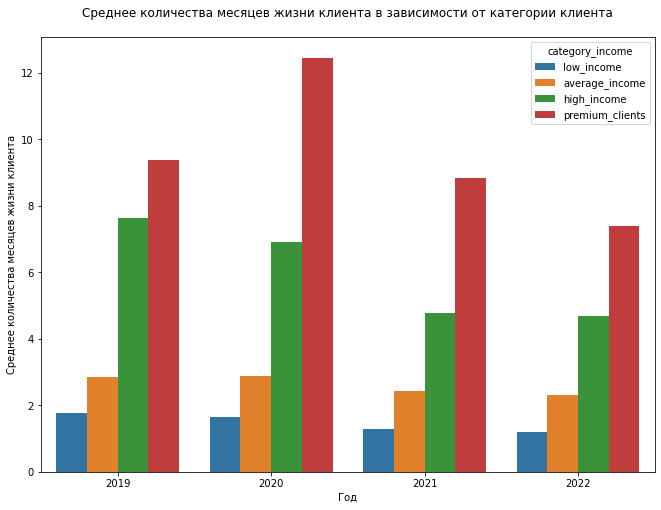

In [17]:
pivot_category = income.groupby(['year','category_income']).agg({'count_month':'mean'}).sort_values(by=['year','count_month']).reset_index()

plt.figure(figsize=(11, 8)) 
sns.barplot(y = 'count_month', x='year',  data=pivot_category, hue='category_income')
plt.title('Среднее количества месяцев жизни клиента в зависимости от категории клиента', pad = 20)
plt.xlabel('Год')
plt.ylabel('Среднее количества месяцев жизни клиента')
plt.show()


**Промежуточный вывод**
- Низкодоходные клиенты - это клиенты, которые приходят на 1-2 месяца и исчезают. 
- Среднедоходные клиенты - живут около 2-3 месяцев.
- Высокодоходные - 5-7 месяцев.
- Премиум клиенты - от 8 и выше.

- Тем не менее есть небольшая тенденция к снижению пользования платформой у всех категорий. 
- 2022 год еще не набрал достаточно месяцев для анализа, но тенденция видна уже по 2021му.
- Можно сделать логичный вывод, что чем выше доход клиента - тем дольше он задержится на платформе. 

<div class="alert alert-info"> Корреляция ПОСЛЕДНЕГО дохода клиента с количеством месяцев использования ресурса</div>

In [18]:
income[['last_value','count_month']].corr()

,last_value,count_month
last_value,1.0000,0.4353
count_month,0.4353,1.0000


<AxesSubplot:xlabel='count_month'>

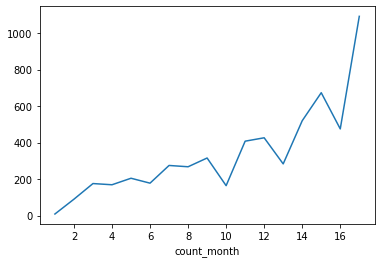

In [19]:
income.groupby('count_month')['last_value'].median().plot()

**Промежуточный вывод**
- Корреляция есть. 0.4 - это довольно высокий показатель. Чем дольше пользователь на платформе тем выше его последний доход.
- График это подтверждает
- Исходя из этого графика и анализа категорий доходности клиентов можно сделать вывод, что чем меньше дохнодность, тем теньше вероятность, что пользователь задержиться на платформе. В группе риска пользователи первого-второго месяца с низким доходом.

<div class="alert alert-info">Количество регистраций в зависимости от ресурса</div>

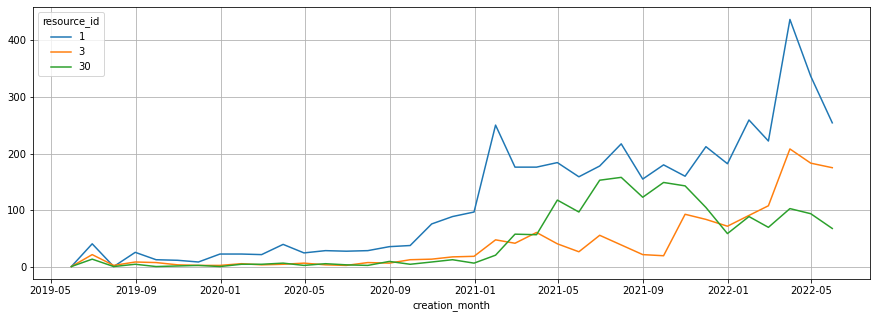

In [20]:
%matplotlib inline

data.pivot_table(
    index='creation_month',  # даты первых посещений
    columns='resource_id',  # источники переходов
    values='user_id',  # ID пользователей
    aggfunc='nunique'  # подсчёт уникальных значений
).plot(figsize=(15, 5), grid=True)

plt.show()

**Промежуточный вывод**
- Видим, что пользователи активно используют все 3 ресурса. 
- Но к 22му году ресурс 30 пошел немного на спад, а ресурс 3 наоборот вырос по количеству юзеров.
- Лидер по регистрациям - ресурс 1. Ближе к маю 22го года был сильный скачок регистраций этого ресурса.

# 3. Retention Rate и LTV


<div class="alert alert-info">Retention Rate c горизонтом анализа 16 месяцев</div>

Данные для Retention Rate берем с начала 2021 года, так как нет полных данных для клиентов у которых была регистрация в 2019-2020 годах. Так же вижу смысл делать актуальный анализ для прогноза на 22ой год.

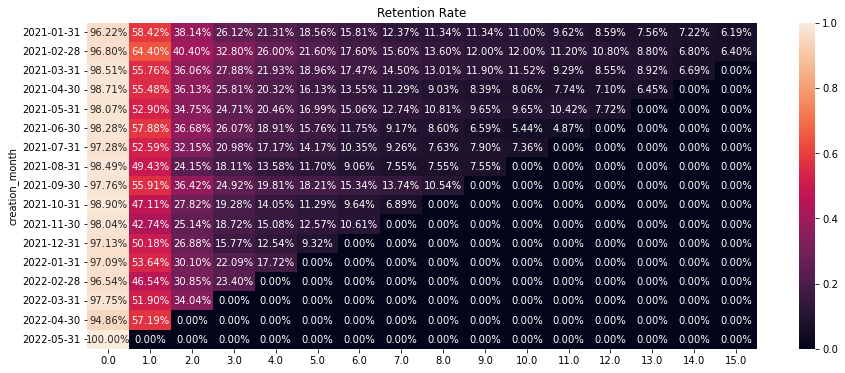

In [21]:
# задаём момент и горизонт анализа данных
observation_date = datetime(2022, 5, 31).date()
horizon_month = 16
dimensions = ['creation_month']
ignore_horizon=True

retention_raw, retention = get_retention(
    profiles, observation_date, horizon_month, dimensions, ignore_horizon
)

# строим хитмэп
plt.figure(figsize=(15, 6))  # задаём размер графика
sns.heatmap(
    retention.drop(columns=['cohort_size']),  # удаляем размеры когорт
    annot=True,  # включаем подписи
    fmt='.2%',  # переводим значения в проценты
)
plt.title('Retention Rate')  # название графика
plt.show()


In [22]:
print('Размер когорт')
retention['cohort_size'].describe()

Размер когорт


count     17.000000
mean     366.294118
std      123.441669
min      250.000000
25%      279.000000
50%      349.000000
75%      376.000000
max      711.000000
Name: cohort_size, dtype: float64

**Промежуточный вывод**
- Размеры когорт от 250 до 711 юзеров в каждой.
- Во всех исследуемых когортах кофициент удержания схожий. Незначительно выделяются некоторые когорты с более высоким и более низким коэффициентом.
- Так же можно заменить тенценцию, что коэффициент удержания в более раних когорт - ВЫШЕ, чем в более поздних.
- Мы видим что в первым месяц регистрации практически у всех пользователей отмечается какой либо доход, а значит их присутствие на платформе.
- на второй месяц остается в среднем 45-60% от этих пользователей.
- на третий около 30. Тоесть 70% пользователей теряется за первые 3 месяца.
- Далее отток пользователей идет намного медленнее.
- на 10ый месяц остается 5-10% пользователей от изначального числа.

<div class="alert alert-info">Анализ удержания пользователей с разбивкой по resource_id</div>

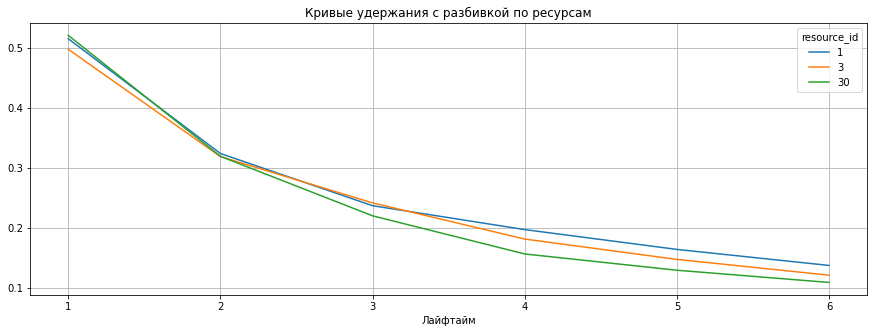

In [23]:
# задаём момент и горизонт анализа данных
observation_date = datetime(2022, 5, 31).date()
horizon_month = 7
dimensions = ['resource_id']
ignore_horizon=False

retention_raw, retention = get_retention(
    profiles, observation_date, horizon_month, dimensions, ignore_horizon
)

report = retention.drop(columns=['cohort_size', 0])
report.T.plot(grid=True, xticks=list(report.columns.values), figsize=(15, 5))
plt.xlabel('Лайфтайм')
plt.title('Кривые удержания с разбивкой по ресурсам')
plt.show()

**Промежуточный вывод**
- у ресурса 1 удержание пользователей ближе к 6 му лайфтайму чуть выше остальных. Примерно на уровне 15%.
- у ресурса 30 - показатель уже ближе к 10%.
- до 2го лайфтайма показатели всех ресурсов практически идентичные.

рассмотрим чуть подробнее на тепловой карте:

<div class="alert alert-info">Анализ удержания пользователей с разбивкой по resource_id (тепловая карта)</div>

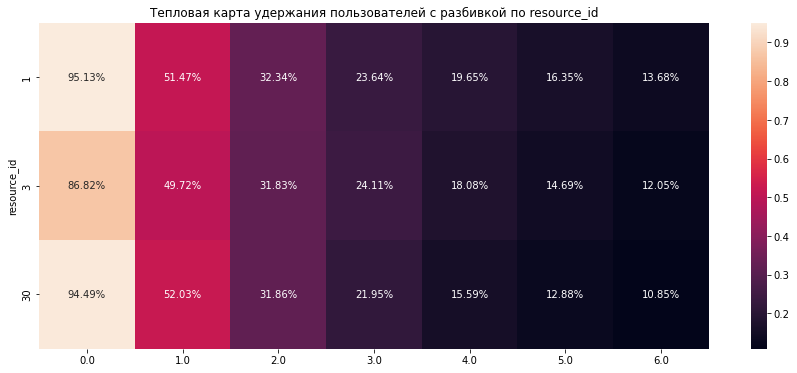

In [24]:
# задаём момент и горизонт анализа данных
observation_date = datetime(2022, 5, 31).date()
horizon_month = 7
dimensions = ['resource_id']
ignore_horizon=False

retention_raw, retention = get_retention(
    profiles, observation_date, horizon_month, dimensions, ignore_horizon
)
# строим хитмэп

plt.figure(figsize=(15, 6))  # задаём размер графика
sns.heatmap(
    retention.drop(columns=['cohort_size']),  # удаляем размеры когорт
    annot=True,  # включаем подписи
    fmt='.2%',  # переводим значения в проценты
)
plt.title('Тепловая карта удержания пользователей с разбивкой по resource_id')  # название графика
plt.show()

**Промежуточный вывод**
- Тут так же отчетливо видно провесание второго ресурса на нулевой лайфтайме. 86% пользователей против 95% на остальных ресурсах.
- Но к 6му лайфтайму отток снижается и количество оставшихся пользователей выравнивается по отношению к другим ресурсам.

<div class="alert alert-info">LTV c горизонтом анализа 7 месяцев</div>

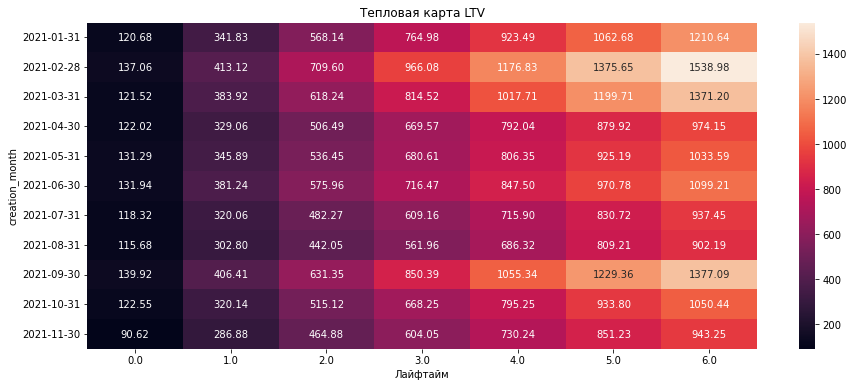

In [25]:
observation_date = datetime(2022, 5, 31).date()
horizon_month = 7
dimensions = ['creation_month']
ignore_horizon=False

result_raw, result_grouped = get_ltv(
    profiles, observation_date, horizon_month, dimensions, ignore_horizon
)

plt.figure(figsize=(15, 6))  # задаём размер графика
sns.heatmap(result_grouped.drop(columns=['cohort_size']), annot=True, fmt='.2f')
plt.title('Тепловая карта LTV')
plt.xlabel('Лайфтайм')
plt.show()

**Промежуточный вывод**
- В анализ попали почти все когорты 2021 года регистрации, так как они успели набрать нужное каличество месяцев для анализа.
- На карте можно увидеть как минимум 3 когорты с LTV намного выше среднего - это февраль,март и сентябрь.

<div class="alert alert-info">LTV c горизонтом анализа 3 месяца</div>

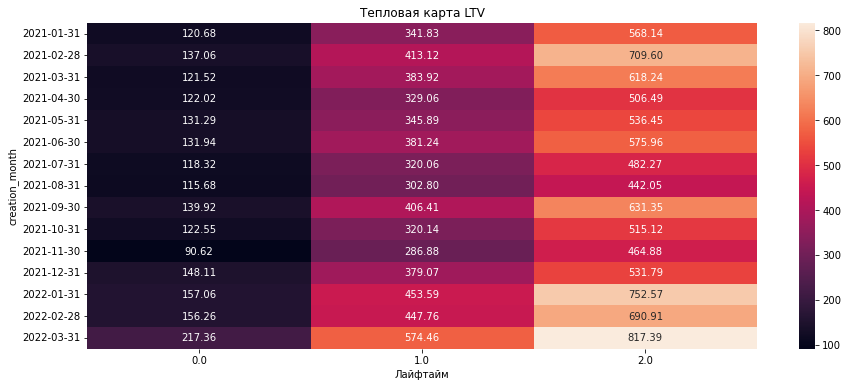

In [26]:
observation_date = datetime(2022, 5, 31).date()
horizon_month = 3
dimensions = ['creation_month']
ignore_horizon=False

result_raw, result_grouped = get_ltv(
    profiles, observation_date, horizon_month, dimensions, ignore_horizon
)

plt.figure(figsize=(15, 6))  # задаём размер графика
sns.heatmap(result_grouped.drop(columns=['cohort_size']), annot=True, fmt='.2f')
plt.title('Тепловая карта LTV')
plt.xlabel('Лайфтайм')
plt.show()

**Промежуточный вывод**
- горизон анализа в 3 месяца был выбран, чтобы посмотреть на когорты 22го года.
- видим что LTV январской, февральской и мартовской когорт 22го года выше, чем многие когорты 21го.

<div class="alert alert-info">LTV с разбивкой по resource_id</div>

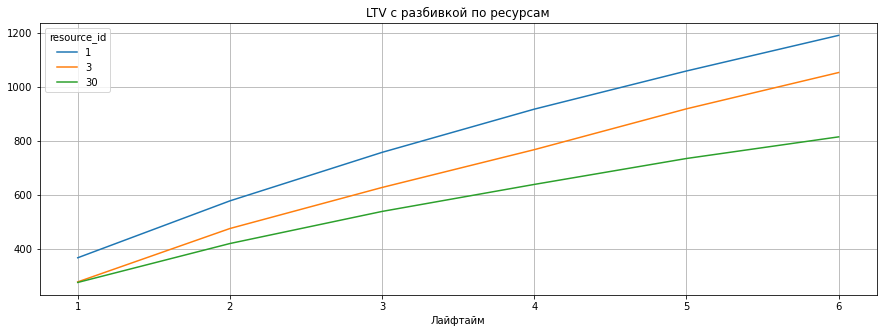

In [27]:
observation_date = datetime(2022, 5, 31).date()
horizon_month = 7
dimensions = ['resource_id']
ignore_horizon=False

result_raw, result_grouped = get_ltv(
    profiles, observation_date, horizon_month, dimensions, ignore_horizon
)

report = result_grouped.drop(columns=['cohort_size', 0])
report.T.plot(grid=True, xticks=list(report.columns.values), figsize=(15, 5))
plt.xlabel('Лайфтайм')
plt.title('LTV с разбивкой по ресурсам')
plt.show()

**Промежуточный вывод**
- ресурс 1 покавызает более высокий LTV начиная с 1го лайфтайма.
- у ресурса 30 - LTV значительно ниже. Около 800 долл к 6му лайфтайму против 1200 долл у 1го ресурса

# 5. Прогноз

<div class="alert alert-info">Прогноз выживаемости пользователей до конца 2022 года</div>

*Значения прогнозируемого месяца были расчитаны умножением нынешнего на коэффициент среднего прироста между такими же лайфтаймами у двух предыдущих когорт*

In [28]:
forecast_users = data_pivot.pivot_table(
    index='creation_month',
    columns='date',
    values='user_id', 
    aggfunc='nunique',
        ).reset_index()
forecast_users.columns = ['creation_month', '2021-01','2021-02','2021-03','2021-04','2021-05','2021-06','2021-07','2021-08','2021-09','2021-10','2021-11','2021-12','2022-01','2022-02','2022-03','2022-04','2022-05']
cohort_sizes = (
    data_pivot.groupby('creation_month')
    .agg({'user_id': 'nunique'})
    .rename(columns={'user_id': 'cohort_size'})
)

# объединяем размеры когорт и таблицу удержания
forecast_users = cohort_sizes.merge(
        forecast_users, on='creation_month', how='left'
    ).fillna(0)
forecast_users

date = ['2022-03','2022-04','2022-05','2022-06','2022-07','2022-08','2022-09','2022-10','2022-11','2022-12']
for i in range(3,10):
    forecast_users[date[i]]=forecast_users[date[i-1]]*((forecast_users[date[i-1]].shift(1) / forecast_users[date[i-2]].shift(1) + forecast_users[date[i-2]].shift(2) / forecast_users[date[i-3]].shift(2)) / 2)
forecast_users.tail()


,creation_month,cohort_size,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
32,2022-01-31,412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,400.0,221.0,124.0,91.0,73.0,57.530952,48.714217,38.112351,32.018806,32.411894,29.060458,27.810094
33,2022-02-28,376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,363.0,175.0,116.0,88.0,70.296703,53.810453,45.625868,35.178427,29.809626,30.158958,27.015751
34,2022-03-31,711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,695.0,369.0,242.0,180.591491,144.565653,112.296534,95.151531,73.903501,62.356079,63.104212
35,2022-04-30,584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,554.0,334.0,220.220178,165.700986,132.505955,102.179444,86.608501,67.022510,56.672014
36,2022-05-31,471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,471.0,267.015396,175.585107,131.572864,105.270203,81.474751,69.047229,53.530547


<div class="alert alert-info">Прогноз дохода пользователей до конца 2022 года</div>

*Значения прогнозируемого месяца были расчитаны умножением нынешнего на коэффициент среднего прироста между такими же лайфтаймами у двух предыдущих когорт**

In [29]:
forecast_income = data_pivot.pivot_table(
    index='creation_month',
    columns='date',
    values='value', 
    aggfunc='sum',
        ).reset_index()
forecast_income.columns = ['creation_month', '2021-01','2021-02','2021-03','2021-04','2021-05','2021-06','2021-07','2021-08','2021-09','2021-10','2021-11','2021-12','2022-01','2022-02','2022-03','2022-04','2022-05']
cohort_sizes = (
    data_pivot.groupby('creation_month')
    .agg({'user_id': 'nunique'})
    .rename(columns={'user_id': 'cohort_size'})
)

# объединяем размеры когорт и таблицу удержания
forecast_income = cohort_sizes.merge(
        forecast_income, on='creation_month', how='left'
    ).fillna(0)

date = ['2022-03','2022-04','2022-05','2022-06','2022-07','2022-08','2022-09','2022-10','2022-11','2022-12']

for i in range(3,10):
    forecast_income[date[i]]=forecast_income[date[i-1]]*((forecast_income[date[i-1]].shift(1) / forecast_income[date[i-2]].shift(1) + forecast_income[date[i-2]].shift(2) / forecast_income[date[i-3]].shift(2)) / 2)

forecast_income.tail()


,creation_month,cohort_size,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
32,2022-01-31,412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64710.71,122169.01,123178.67,100720.43,68873.24,56682.947843,44261.605807,33472.061508,28716.875296,25904.328817,18972.933275,16872.215889
33,2022-02-28,376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,58754.37,109603.40,91424.88,57865.73,45839.065089,34612.906390,27379.657779,20324.510438,17548.401615,15773.356296,11558.941722
34,2022-03-31,711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,154544.98,253894.59,172726.34,125279.234969,92454.109826,72950.924356,57335.316895,42960.033987,36974.551073,33293.883465
35,2022-04-30,584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,88886.50,159861.48,121051.111159,82208.032521,62895.182038,48559.682967,38288.537652,28555.563844,24616.095607
36,2022-05-31,471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,50581.88,87034.783551,62557.656309,43928.709247,33013.693397,25769.222554,20285.889672,15164.476197


# 5. Выводы

**Исследовательский анализ данных**

1. Количество регистраций пользователей(обьем когорт)
- Видим, что декабря 2020 года количество регистраций резко увеличилось.
- В марте 2022 года еще один сильный скачок регистаций с 400 до 700 новых пользователей в месяц.

2. Срений доход клиента в зависимости от даты регистрации
- Мы видим, что средний доход пользователей, которые зарегистрировались до 2021 года значительно выше, не смотря на то, что данные собраны только с 2021 года. Предположу, что либо данные о доходах были перенесены (сдвинуты) по датам для анализа, либо ошибка в дате регистрации. Исхожу из того что данная часть датасета сильно отличается от новой(начиная с 2021 года).

3. Среднее количество месяцев жизни клиента
- Видим, что срок жизни клиентов падает. в 2019-2020 годах он держался на уровне 6-8 ми месяцев. В 21-ом году опустился до 2-3 месяцев.

4. Сегментация клиентов по критерию дохода
- В статистике видим, что средний доход(mean - 285 дол.) намного выше медианного дохода (77 долл.), что говорит о том, что есть очень высокодоходные клиенты.
- Максимальный средний доход пользователя - 8098 долл.
- Минимальный имеет небольшое минусовое значение. (Причиной минуса скорей всего является ошибка, но пока не буду ее трогать)
- Только 5% клиектов имеют средний дохов выше 1200 долл и только 1% - выше 2300 долл.

Предлагаю такое распределение категорий:

- около 45% клиентов (до 50 долл) - низкодоходные клиенты
- около 30% клиентов (от 50 до 300 долл) - среднедоходное клиенты
- около 20% клиентов (от 300 до 1000 долл) - высокодоходные клиенты
- около 5 % клиентов (от 1000 до 8000 долл) - премиум клиенты
- При необходимости данное распределение можно изменить в зависимости от целей бизнеса

5. Продолжительность жизни в зависимости от категории клиента
- Низкодоходные клиенты - это клиенты, которые приходят на 1-2 месяца и исчезают.
- Среднедоходные клиенты - живут около 2-3 месяцев.
- Высокодоходные - 5-7 месяцев.
- Премиум клиенты - от 8 и выше.
- Тем не менее есть небольшая тенденция к снижению пользования платформой у всех категорий.
- 2022 год еще не набрал достаточно месяцев для анализа, но тенденция видна уже по 2021му.
- Можно сделать логичный вывод, что чем выше доход клиента - тем дольше он задержится на платформе.

6. Корреляция ПОСЛЕДНЕГО дохода клиента с количеством месяцев использования ресурса
- Корреляция есть. 0.4 - это довольно высокий показатель. Чем дольше пользователь на платформе тем выше его последний доход.
- График это подтверждает
- Исходя из этого графика и анализа категорий доходности клиентов можно сделать вывод, что чем меньше дохнодность, тем теньше вероятность, что пользователь задержиться на платформе. 
- В группе риска пользователи первого-второго месяца с низким доходом.

7. Количество регистраций в зависимости от ресурса
- Видим, что пользователи активно используют все 3 ресурса. 
- Но к 22му году ресурс 30 пошел немного на спад, а ресурс 3 наоборот вырос по количеству юзеров.
- Лидер по регистрациям - ресурс 1. Ближе к маю 22го года был сильный скачок регистраций этого ресурса.

**Retention Rate и LTV**

1. Retention Rate c горизонтом анализа 16 месяцев
- Данные для Retention Rate берем с начала 2021 года, так как нет полных данных для клиентов у которых была регистрация в 2019-2020 годах. Так же вижу смысл делать актуальный анализ для прогноза на 22ой год.
- Размеры когорт от 250 до 711 юзеров в каждой.
- Во всех исследуемых когортах кофициент удержания схожий. Незначительно выделяются некоторые когорты с более высоким и более низким коэффициентом.
- Так же можно заменить тенценцию, что коэффициент удержания в более раних когорт - ВЫШЕ, чем в более поздних.
- Мы видим что в первым месяц регистрации практически у всех пользователей отмечается какой либо доход, а значит их присутствие на платформе.
- на второй месяц остается в среднем 45-60% от этих пользователей.
- на третий около 30. Тоесть 70% пользователей теряется за первые 3 месяца.
- Далее отток пользователей идет намного медленнее.
- на 10ый месяц остается 5-10% пользователей от изначального числа.
2. Анализ удержания пользователей с разбивкой по resource_id
- у ресурса 1 удержание пользователей ближе к 6 му лайфтайму чуть выше остальных. Примерно на уровне 15%.
- у ресурса 30 - показатель уже ближе к 10%.
- до 2го лайфтайма показатели всех ресурсов практически идентичные.
- Тут так же отчетливо видно провесание второго ресурса на нулевой лайфтайме. 86% пользователей против 95% на остальных ресурсах.
- Но к 6му лайфтайму отток снижается и количество оставшихся пользователей выравнивается по отношению к другим ресурсам.
3. LTV c горизонтом анализа 7 месяцев
- В анализ попали почти все когорты 2021 года регистрации, так как они успели набрать нужное каличество месяцев для анализа.
- На карте можно увидеть как минимум 3 когорты с LTV намного выше среднего - это февраль,март и сентябрь.
4. LTV c горизонтом анализа 3 месяцев
- горизон анализа в 3 месяца был выбран, чтобы посмотреть на когорты 22го года.
- видим что LTV январской, февральской и мартовской когорт 22го года выше, чем многие когорты 21го.
5. LTV с разбивкой по resource_id
- ресурс 1 покавызает более высокий LTV начиная с 1го лайфтайма.
- у ресурса 30 - LTV значительно ниже. Около 800 долл к 6му лайфтайму против 1200 долл у 1го ресурса


**Прогноз**

- Был расчитан прогноз выживаемости пользователей и прогноз дохода пользователей до конца 2022 года
- Значения прогнозируемого месяца были расчитаны умножением нынешнего на коэффициент среднего прироста между такими же лайфтаймами у двух предыдущих когорт

## Test task 2

**Task 2. Technology selection**

Task:
We have a lot of content – hundredthousands of photos and videos.
But we don’t know what the content type is – selfie, family photo, photo on the
beach, etc.

Please, suggest a technology/platform which can help to categorize all the content
in real time and explain your choice.

<div class="alert alert-info">Платформа, которая может помочь классифицировать весь контент в режиме реального времени</div>

Чтобы классифицировать большой объем фотографий и видео в режиме реального времени, можно рассмотреть возможность использования возможностей компьютерного зрения и технологий машинного обучения. Одной из платформ, которая может помочь в решении этой задачи, является **Google Cloud Vision API.**

*API Google Cloud Vision* предлагает расширенные возможности анализа изображений и видео. Он использует модели машинного обучения для понимания содержимого изображений и видео, что позволяет извлекать соответствующую информацию и классифицировать контент. 

**Классификация изображений:** Vision API может анализировать отдельные изображения и предоставлять метки, описывающие объекты, сцены и действия, представленные на каждом изображении. Он может обнаруживать общие объекты, места и даже эмоции людей на фотографиях. Это может помочь вам классифицировать изображения по разным типам, таким как селфи, семейные фотографии, пляжные фотографии и т. д.

**Обнаружение лиц:** API может идентифицировать и находить человеческие лица на изображениях или видеокадрах. Анализируя черты лица и атрибуты, вы можете определить, содержит ли изображение селфи или групповое фото, что поможет вам дополнительно классифицировать контент.

**Обнаружение меток:** Vision API может генерировать набор меток, описывающих визуальное содержимое изображения или видеокадра. Эти метки могут представлять объекты, ориентиры, действия и многое другое. Анализируя эти метки, вы можете классифицировать контент на основе идентифицированных объектов или сцен.

**Видеоаналитика:** Vision API также предлагает возможности анализа видео. Он может анализировать видеоконтент кадр за кадром и предоставлять информацию, такую, как изменения кадра, явное обнаружение контента и отслеживание объектов. Это может помочь в категоризации видео на основе контента и действий, зафиксированных в них.

Используя Google Cloud Vision API, можно автоматизировать процесс категоризации вашей большой коллекции фотографий и видео. API предоставляет надежную и масштабируемую инфраструктуру, позволяющую обрабатывать контент в режиме реального времени или в пакетном режиме, в зависимости от требований.







## Test task 3

**Task 3. Survey**

We have launched new application. Our goal is to understand the fundamentals:
users pain points, areas of improvements, general UI/UX issues.

Please, advice a questionary to measure major Users satisfaction metrics.

You can use Google Survey or any other tool to share it with us.

<div class="alert alert-info">Опрос</div>

*Я решила написать структуру опроса и общие мысли как его составлять прямо здесь, так как для составления конкретных вопросов хорошо бы видеть само приложение.*


1. Краткое представление и цель анкеты.
- Заверяем респондентов, что их отзывы ценны и будут использованы для улучшения приложения.
2. Демографическая информация:
- Тут вопросы, чтобы понять предысторию наших пользователей, например возраст, пол, местоположение и род занятий. Эта информация может дать представление о предпочтениях и шаблонах пользователей.
3. Общий уровень Удовлетворенности:
- Используем оценочную шкалу (например, 1–5) или шкалу Лайкерта для измерения общей удовлетворенности пользователей приложением.
- Пример вопроса: «Насколько вы удовлетворены нашим приложением по шкале от 1 до 5?»
4. Болевые точки и проблемы:
- Задаем открытые вопросы, чтобы определить болевые точки и области, в которых пользователи сталкиваются с трудностями.
- Пример вопроса: «С какими самыми большими проблемами вы столкнулись при использовании нашего приложения?»
5. Особенности и функциональность:
- Вопросы о конкретных функциях и функциях, чтобы понять предпочтения пользователей и области для улучшения.
- Пример вопроса: «Какие функции нашего приложения вы считаете наиболее полезными(дать возможность выбрать из нескольких)? Есть ли какие-либо функции, которые, по вашему мнению, отсутствуют?»
6. Пользовательский интерфейс и пользовательский опыт:
- Вопросы об аспектах UI/UX приложения, чтобы выявить любые проблемы с удобством использования или улучшения.
- Пример вопроса: «Как бы вы оценили простоту использования и интуитивность интерфейса нашего приложения?»
7. Предложения и отзывы:
- Открытый вопрос, чтобы пользователи могли поделиться любыми дополнительными отзывами, предложениями или идеями по улучшению.
- Пример вопроса: «Есть ли у вас какие-либо другие отзывы или предложения, которые помогут нам улучшить ваше взаимодействие с нашим приложением?»
8. Конец опроса
- Благодарим респондентов за их время и отзывы.
- Можем предоставить респондентам возможность оставить свою контактную информацию, если они захотят участвовать в будущих исследованиях пользователей или бета-тестировании.